In [7]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

## Estimates of Location

- The basic metric for location is the mean, but it can be sensitive to extreme values (outlier).

- Other metrics (median, trimmed mean) are less sensitive to outliers and unusual distributions and hence are more robust.

### Example: Location Estimates of Population and Murder Rates

In [9]:
# Table 1-2
state = pd.read_csv("./data/state.csv")
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


Compute the mean, trimmed mean, and median for Population. For mean and median we can use the pandas methods of the data frame. The trimmed mean requires the trim_mean function in scipy.stats.

In [10]:
state['Population'].mean()

6162876.3

In [11]:
trim_mean(state['Population'], 0.1)

4783697.125

In [12]:
state['Population'].median()

4436369.5

The mean is bigger than the trimmed mean, which is bigger than the median.

This is because the trimmed mean excludes the largest and smallest five states (trim=0.1 drops 10% from each end)

Weighted mean is available with numpy. For weighted median, we can use the specialised package wquantiles

In [13]:
state['Murder.Rate'].mean()

4.066

In [14]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [15]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

## Estimates of Variability


Location is just one dimension in summarizing a feature. A second dimension, variability, also referred to as dispersion, measures whether the data values are tightly clustered or spread out. At the heart of statistics lies variability: measuring it, reducing it, distinguishing random from real variability, identifying the various sources of real variability, and making decisions in the presence of it.

The most widely used estimates of variation are based on the differences, or deviations, between the estimate of location and the observed data. For a set of data {1, 4, 4}, the mean is 3 and the median is 4. The deviations from the mean are the differences: 1 – 3 = –2, 4 – 3 = 1, 4 – 3 = 1. These deviations tell us how dispersed the data is around the central value.

One way to measure variability is to estimate a typical value for these deviations. Averaging the deviations themselves would not tell us much—the negative deviations offset the positive ones. In fact, the sum of the deviations from the mean is precisely zero. Instead, a simple approach is to take the average of the absolute values of the deviations from the mean. In the preceding example, the absolute value of the deviations is {2 1 1}, and their average is (2 + 1 + 1) / 3 = 1.33

The best-known estimates of variability are the variance and the standard deviation, which are based on squared deviations. The variance is an average of the squared deviations, and the standard deviation is the square root of the variance

**The standard deviation is much easier to interpret than the variance since it is on the same scale as the original data.** <br>Still, with its more complicated and less intuitive formula, it might seem peculiar that the standard deviation is preferred in statistics over the mean absolute deviation. It owes its preeminence to statistical theory: mathematically, working with squared values is much more convenient than absolute values, especially for statistical models.

### Example: Variability Estimates of State Population

In [16]:
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


In [17]:
state['Population'].std()

6848235.347401142

Median absolute deviation from the median can be calculated with a method in statsmodels

In [19]:
robust.scale.mad(state['Population'])

3849876.1459979336

## Exploring the Data Distribution

Each of the estimates we’ve covered sums up the data in a single number to describe the location or variability of the data. It is also useful to explore how the data is distributed overall.

### Frequency Table and Histograms

The cut method for pandas data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method value_counts returns a frequency table.

In [21]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [22]:
# Table 1.5
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


Pandas also supports histograms for exploratory data analysis.

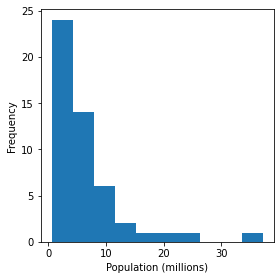

In [23]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

## Exploring Binary and Categorical Data

A bar chart resembles a histogram; in a bar chart the x-axis represents different categories of a factor variable, while in a histogram the x-axis represents values of a single variable on a numeric scale. In a histogram, the bars are typically shown touching each other, with gaps indicating values that did not occur in the data. In a bar chart, the bars are shown separate from one another.

**Mode**

The mode is the value—or values in case of a tie—that appears most often in the data. For example, the mode of the cause of delay at Dallas/Fort Worth airport is “Inbound.” As another example, in most parts of the United States, the mode for religious preference would be Christian. The mode is a simple summary statistic for categorical data, and it is generally not used for numeric data.

- Categorical data is typically summed up in proportions and can be visualized in a bar chart.

- Categories might represent distinct things (apples and oranges, male and female), levels of a factor variable (low, medium, and high), or numeric data that has been binned.

- Expected value is the sum of values times their probability of occurrence, often used to sum up factor variable levels.

In [28]:
dfw = pd.read_csv("./data/dfw_airline.csv")

In [30]:
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


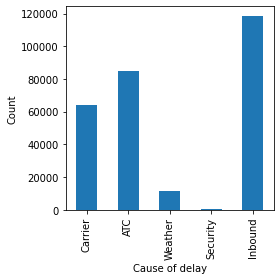

In [29]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## Correlation

Exploratory data analysis in many modeling projects (whether in data science or in research) involves examining correlation among predictors, and between predictors and a target variable. Variables X and Y (each with measured data) are said to be positively correlated if high values of X go with high values of Y, and low values of X go with low values of Y. If high values of X go with low values of Y, and vice versa, the variables are negatively correlated.

- Correlation coefficient <br>
A metric that measures the extent to which numeric variables are associated with one another (ranges from –1 to +1).


- Correlation matrix <br>
A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables.


- Scatterplot<br>
A plot in which the x-axis is the value of one variable, and the y-axis the value of another.

**Variables can have an association that is not linear, in which case the correlation coefficient may not be a useful metric.**

In [31]:
sp500_sym = pd.read_csv('./data/sp500_sectors.csv')
sp500_px = pd.read_csv('./data/sp500_data.csv.gz', index_col=0)

In [32]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


In [33]:
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


Next we focus on funds traded on major exchanges (sector == 'etf').

In [34]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
etfs.head()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


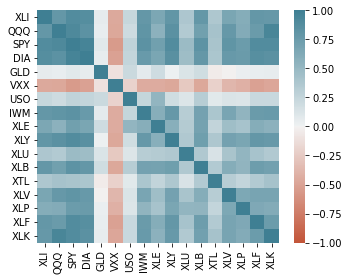

In [35]:

fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

- The correlation coefficient measures the extent to which two paired variables (e.g., height and weight for individuals) are associated with one another.

- When high values of v1 go with high values of v2, v1 and v2 are positively associated.

- When high values of v1 go with low values of v2, v1 and v2 are negatively associated.

- The correlation coefficient is a standardized metric, so that it always ranges from –1 (perfect negative correlation) to +1 (perfect positive correlation).

- A correlation coefficient of zero indicates no correlation, but be aware that random arrangements of data will produce both positive and negative values for the correlation coefficient just by chance.